In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

/home/ui2004/.venv/lib/python3.11/site-packages/torch/_subclasses/functional_tensor.py:295: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:84.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


Using device: cuda


# Question 1

In [1]:
import numpy as np
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import random
import gymnasium as gym
import copy
import os
import cv2

## a)

THE MOUNTAIN CAR ENVIRONMENT
State Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action Space: Discrete(3)


Initial State = [-0.5249016  0.       ]
Done=True, Last state=[-0.57393914  0.00156892], Last step Reward=-1.0
Episode 1: Total Reward = -200.0: Total steps = 200

Initial State = [-0.43981886  0.        ]
Done=True, Last state=[-5.7092184e-01 -4.6534979e-04], Last step Reward=-1.0
Episode 2: Total Reward = -200.0: Total steps = 200

Initial State = [-0.44958773  0.        ]
Done=True, Last state=[-0.54321116  0.01197767], Last step Reward=-1.0
Episode 3: Total Reward = -200.0: Total steps = 200

Initial State = [-0.5523882  0.       ]
Done=True, Last state=[-0.47023037  0.00359085], Last step Reward=-1.0
Episode 4: Total Reward = -200.0: Total steps = 200

Initial State = [-0.4921124  0.       ]
Done=True, Last state=[-0.49235424  0.01644503], Last step Reward=-1.0
Episode 5: Total Reward = -200.0: Total steps = 200

Average Reward: -200.0
So, each episode terminated af

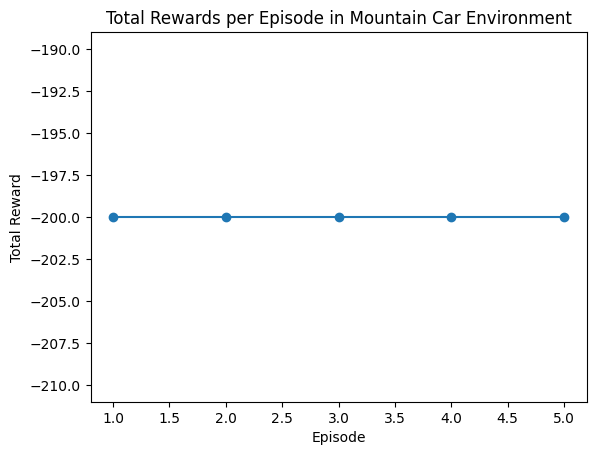

In [2]:
env = gym.make("MountainCar-v0")
print("THE MOUNTAIN CAR ENVIRONMENT")

print("State Space:", env.observation_space)
print("Action Space:", env.action_space)
print("\n")

total_reward = 0
num_episodes = 5
episode_rewards = []

for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    episode_reward = 0
    n_steps = 0
    print(f"Initial State = {state}")
    
    while not done:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, _ = env.step(action)
        episode_reward += reward
        n_steps += 1
        done = terminated or truncated
        
    total_reward += episode_reward
    episode_rewards.append(episode_reward)
    print(f"Done={done}, Last state={next_state}, Last step Reward={reward}")
    print(f"Episode {episode + 1}: Total Reward = {episode_reward}: Total steps = {n_steps}\n")


average_reward = total_reward / num_episodes
print("Average Reward:", average_reward)
print("So, each episode terminated after 200 steps and each step yielded -1 as reward ")
plt.plot(range(1, num_episodes + 1), episode_rewards, marker='o')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Rewards per Episode in Mountain Car Environment")
plt.show()

THE PONG ENVIRONMENT 
State Space: Box(0, 255, (210, 160, 3), uint8)
Action Space: Discrete(6)


Done=True, Last state shape=(210, 160, 3), Last step Reward=-1.0
Episode 1: Total Reward = -19.0: Total steps = 1009

Done=True, Last state shape=(210, 160, 3), Last step Reward=-1.0
Episode 2: Total Reward = -20.0: Total steps = 904

Done=True, Last state shape=(210, 160, 3), Last step Reward=-1.0
Episode 3: Total Reward = -21.0: Total steps = 824

Done=True, Last state shape=(210, 160, 3), Last step Reward=-1.0
Episode 4: Total Reward = -20.0: Total steps = 1020

Done=True, Last state shape=(210, 160, 3), Last step Reward=-1.0
Episode 5: Total Reward = -21.0: Total steps = 912

Average Reward: -20.2


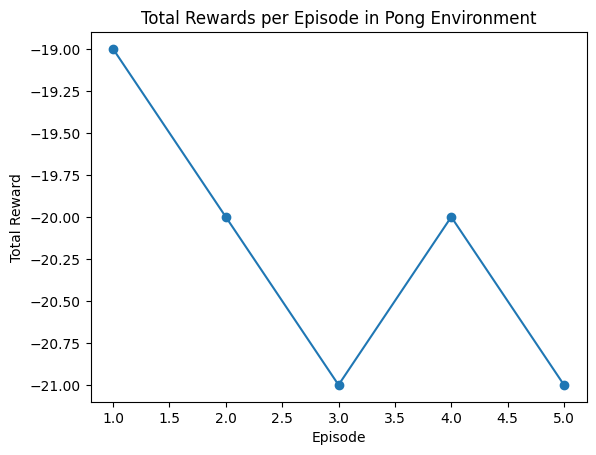

In [5]:
env = gym.make("ALE/Pong-v5")
print("THE PONG ENVIRONMENT ")

print("State Space:", env.observation_space)
print("Action Space:", env.action_space)
print("\n")

total_reward = 0
num_episodes = 5
episode_rewards = [] 

for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0
    n_steps = 0
    
    while not done:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, _ = env.step(action)
        episode_reward += reward
        n_steps += 1
        done = terminated or truncated
        
    total_reward += episode_reward
    episode_rewards.append(episode_reward)
    print(f"Done={done}, Last state shape={np.array(next_state).shape}, Last step Reward={reward}")
    print(f"Episode {episode + 1}: Total Reward = {episode_reward}: Total steps = {n_steps}\n")


average_reward = total_reward / num_episodes
print("Average Reward:", average_reward)
plt.plot(range(1, num_episodes + 1), episode_rewards, marker='o')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Rewards per Episode in Pong Environment")
plt.show()

### Observations

#### MountainCar-v0 Environment
- **State and Action Space:**  
  - State space: `Box([-1.2, -0.07], [0.6, 0.07], (2,), float32)` representing position and velocity.
  - Action space: `Discrete(3)` with actions: push left, push right, no push.

- **Episode Performance:**  
  - Each episode terminated after 200 steps with a consistent reward of `-1` per step.
  - Total reward per episode was `-200`, indicating the agent was unable to reach the goal in all 5 episodes.

#### Pong-v0 Environment
- **State and Action Space:**  
  - State space: `Box(0, 255, (210, 160, 3), uint8)` representing raw pixel data (RGB frames).
  - Action space: `Discrete(6)` for the possible paddle actions (move up, down, or no movement).

- **Episode Performance:**  
  - Episodes ended after varying steps (824 to 1020), with rewards between `-19` and `-21`.
  - Average reward across episodes was `-20.2`, showing the random agent’s consistent loss against the opponent.


## b)

In [ ]:
import torch as T
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

class DQNetwork(nn.Module):
    def __init__(self, input_size, fc1_size, fc2_size, n_actions, lr):
        super(DQNetwork, self).__init__()
        self.input_size = input_size
        self.lr = lr
        self.n_actions = n_actions


        self.network = nn.Sequential(
            nn.Linear(*self.input_size, fc1_size),
            nn.ReLU(),
            nn.Linear(fc1_size, fc2_size),
            nn.ReLU(),
            nn.Linear(fc2_size, n_actions)
        )

        self.loss = nn.MSELoss()
        self.optimiser = optim.Adam(self.parameters(), lr=lr)

        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        print("Running on GPU" if self.device.type == 'cuda' else "Running on CPU")
        
        self.to(self.device)
        
    def forward(self, state):
        return self.network(state)


class DQN_convnet(nn.Module):
    def __init__(self, lr, n_actions, input_size):
        super(DQN_convnet, self).__init__()
        self.target_input_size = (3, 80, 64)


        self.conv_layers = nn.Sequential(
            nn.Conv2d(input_size[0], 32, 8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, stride=1),
            nn.ReLU()
        )

        fc_input_size = self.get_conv_output_dims(self.target_input_size)


        self.fc_layers = nn.Sequential(
            nn.Linear(fc_input_size, 512),
            nn.ReLU(),
            nn.Linear(512, n_actions)
        )


        self.optimiser = optim.RMSprop(self.parameters(), lr=lr)
        self.loss = nn.MSELoss()


        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        print("Running on GPU" if self.device.type == 'cuda' else "Running on CPU")

        self.to(self.device)

    def get_conv_output_dims(self, input_size):

        state = T.zeros(1, *input_size)
        dims = self.conv_layers(state)
        return int(np.prod(dims.size()))

    def forward(self, state):
        state = state.permute(0, 3, 1, 2)  
        conv_state = self.conv_layers(state)
        flat_state = conv_state.reshape(conv_state.size(0), -1) 
        actions = self.fc_layers(flat_state)
        return actions


In [ ]:
class DQNAgent:
    def __init__(self, input_size, n_actions, max_mem_size, batch_size, network_clone_interval,
                 gamma, epsilon, lr, min_epsilon, epsilon_decay_rate, pong=False):


        self.input_size = input_size
        self.n_actions = n_actions
        self.max_mem_size = max_mem_size
        self.batch_size = batch_size
        self.network_clone_interval = network_clone_interval
        self.gamma = gamma
        self.epsilon = epsilon
        self.lr = lr
        self.min_epsilon = min_epsilon
        self.epsilon_decay_rate = epsilon_decay_rate
        self.learn_step_ctr = 0
        self.action_space = list(range(n_actions))


        self.setup_network(pong)


        self.setup_memory(target_input_size=(80, 64, 3))
        

        self.crop_dim = [33, 193, 0, 160]
        self.target_h = 80
        self.target_w = 64

    def setup_network(self, pong):

        if not pong:
            self.Q_network = DQNetwork(self.input_size, fc1_size=24, fc2_size=48, n_actions=self.n_actions, lr=self.lr)
            self.target_Q_network = copy.deepcopy(self.Q_network)
        else:
            self.Q_network = DQN_convnet(self.lr, self.n_actions, input_size=(3, 80, 64))
            self.target_Q_network = DQN_convnet(self.lr, self.n_actions, input_size=(3, 80, 64))

    def setup_memory(self, target_input_size):

        self.mem_ctr = 0
        self.state_memory = np.zeros((self.max_mem_size, *target_input_size), dtype=np.float32)
        self.new_state_memory = np.zeros((self.max_mem_size, *target_input_size), dtype=np.float32)
        self.action_memory = np.zeros(self.max_mem_size, dtype=np.int64)
        self.reward_memory = np.zeros(self.max_mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.max_mem_size, dtype=bool)

    def update_target_network(self):

        self.target_Q_network.load_state_dict(self.Q_network.state_dict())

    def decrease_epsilon(self):

        self.epsilon = max(self.epsilon - self.epsilon_decay_rate, self.min_epsilon)

    def save_models(self, filename):

        os.makedirs('models', exist_ok=True)
        checkpoint = {
            'Q_network_state_dict': self.Q_network.state_dict(),
            'target_Q_network_state_dict': self.target_Q_network.state_dict(),
            'optimiser_state_dict': self.Q_network.optimiser.state_dict(),
            'epsilon': self.epsilon
        }
        T.save(checkpoint, os.path.join('models', filename))

    def load_models(self, filename):

        checkpoint = T.load(filename)
        self.Q_network.load_state_dict(checkpoint['Q_network_state_dict'])
        self.target_Q_network.load_state_dict(checkpoint['target_Q_network_state_dict'])
        self.epsilon = checkpoint['epsilon']
        self.Q_network.optimiser.load_state_dict(checkpoint['optimiser_state_dict'])

    def store_experience(self, state, action, reward, new_state, terminated, truncated):

        mem_index = self.mem_ctr % self.max_mem_size
        self.state_memory[mem_index] = state
        self.new_state_memory[mem_index] = new_state
        self.action_memory[mem_index] = action
        self.reward_memory[mem_index] = reward
        self.terminal_memory[mem_index] = terminated or truncated
        self.mem_ctr += 1

    def choose_action_eps_greedy(self, new_state):

        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return self.greedy_action(new_state)

    def greedy_action(self, state):

        state_tensor = T.tensor([state], dtype=T.float).to(self.Q_network.device)
        actions = self.Q_network.forward(state_tensor)
        return T.argmax(actions).item()

    def learn(self):

        if self.mem_ctr < self.batch_size:
            return None

        self.Q_network.optimiser.zero_grad()
        

        filled_mem_count = min(self.mem_ctr, self.max_mem_size)
        batch_indices = np.random.choice(filled_mem_count, self.batch_size, replace=False)
        
        batch_of_states = T.tensor(self.state_memory[batch_indices]).to(self.Q_network.device)
        batch_of_new_states = T.tensor(self.new_state_memory[batch_indices]).to(self.Q_network.device)
        batch_of_rewards = T.tensor(self.reward_memory[batch_indices]).to(self.Q_network.device)
        batch_of_terminals = T.tensor(self.terminal_memory[batch_indices]).to(self.Q_network.device)
        batch_of_actions = self.action_memory[batch_indices]


        estimated_Q_values = self.Q_network.forward(batch_of_states)[np.arange(self.batch_size), batch_of_actions]
        Q_next_values = self.target_Q_network.forward(batch_of_new_states)
        Q_next_values[batch_of_terminals] = 0.0

        target_Q_values = batch_of_rewards + self.gamma * T.max(Q_next_values, dim=1)[0]
        loss = self.Q_network.loss(target_Q_values, estimated_Q_values).to(self.Q_network.device)
        

        loss.backward()
        self.Q_network.optimiser.step()
        
        self.learn_step_ctr += 1
        if self.learn_step_ctr % self.network_clone_interval == 0:
            self.update_target_network()

        return loss.item()

    def preProcess(self, image):

        frame = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        frame = frame[self.crop_dim[0]:self.crop_dim[1], self.crop_dim[2]:self.crop_dim[3]]
        frame = cv2.resize(frame, (self.target_h, self.target_w))
        frame = frame.reshape(self.target_h, self.target_w) / 255
        return frame

In [ ]:
import gymnasium as gym
import numpy as np
import os
import random
import torch as T


session_file = 'session_info.txt'
variables_file = 'session_variables.npz'
model_directory = 'models'
os.makedirs(model_directory, exist_ok=True)

def load_session_info():
    if os.path.exists(session_file):
        with open(session_file, 'r') as f:
            current_session, current_episode = map(int, f.read().split())
    else:
        current_session, current_episode = 1, 1
    return current_session, current_episode

def save_session_info(session, episode):
    with open(session_file, 'w') as f:
        f.write(f"{session} {episode}")

def load_session_variables():
    if os.path.exists(variables_file):
        data = np.load(variables_file)
        return (data['best_score'], data['scores'].tolist(), data['eps_history'].tolist(), 
                data['steps_array'].tolist(), data['best_rewards_array'].tolist(), data['avg_scores_array'].tolist())
    return -np.inf, [], [], [], [], []

def save_session_variables(best_score, scores, eps_history, steps_array, best_rewards_array, avg_scores_array):
    np.savez(variables_file, best_score=best_score, scores=scores, eps_history=eps_history,
             steps_array=steps_array, best_rewards_array=best_rewards_array, avg_scores_array=avg_scores_array)

def initialize_agent(env, current_episode):
    if current_episode == 1:
        return DQNAgent(input_size=env.observation_space.shape, n_actions=6, max_mem_size=2000, 
                        batch_size=32, network_clone_interval=1000, gamma=0.99, epsilon=1.0, 
                        lr=0.0005, min_epsilon=0.05, epsilon_decay_rate=1e-5, pong=True)
    else:
        agent = DQNAgent(input_size=env.observation_space.shape, n_actions=6, max_mem_size=2000, 
                         batch_size=32, network_clone_interval=1000, gamma=0.99, epsilon=1.0, 
                         lr=0.0005, min_epsilon=0.05, epsilon_decay_rate=1e-5, pong=True)
        load_checkpoint(agent, current_episode - 1)
        return agent

def load_checkpoint(agent, episode):
    checkpoint_path = f'{model_directory}/episode{episode}.pth'
    if os.path.exists(checkpoint_path):
        print("Loading model ...")
        agent.load_models(checkpoint_path)

def save_checkpoint(agent, episode, save_freq=5):
    if episode % save_freq == 0:
        previous_checkpoint = f'{model_directory}/episode{episode - save_freq}.pth'
        if os.path.exists(previous_checkpoint):
            os.remove(previous_checkpoint)
        agent.save_models(f'episode{episode}.pth')

def main():
    current_session, current_episode = load_session_info()
    best_score, scores, eps_history, steps_array, best_rewards_array, avg_scores_array = load_session_variables()
    
    total_episodes = 3000
    episodes_per_session = 10
    print_loss_interval = 10

    print(f"Current Session: {current_session}, Current Episode: {current_episode}")

    while current_episode <= total_episodes:
        env = gym.make("ALE/Pong-v5")
        agent = initialize_agent(env, current_episode)

        for episode in range(episodes_per_session):
            episode_reward, n_steps = play_episode(env, agent)
            

            scores.append(episode_reward)
            eps_history.append(agent.epsilon)
            steps_array.append(n_steps)
            avg_score = compute_average_score(scores, current_episode)

            print(f'Episode: {current_episode}, Avg Score: {avg_score:.1f}, Best Score: {best_score:.2f}, '
                  f'Epsilon: {agent.epsilon:.2f}, Steps: {n_steps}')

            if avg_score > best_score:
                best_score = avg_score
            avg_scores_array.append(avg_score)
            best_rewards_array.append(best_score)


            save_checkpoint(agent, current_episode)
            save_session_variables(best_score, scores, eps_history, steps_array, best_rewards_array, avg_scores_array)
            save_session_info(current_session, current_episode)

            current_episode += 1

        current_session += 1

def play_episode(env, agent):
    prev_state = np.zeros((210, 160, 3), dtype="uint8")
    prev_prev_state = np.zeros((210, 160, 3), dtype="uint8")
    state, _ = env.reset()
    done, episode_reward, n_steps = False, 0, 0

    while not done:

        state1_permuted, state2_permuted = preprocess_and_stack_frames(agent, prev_prev_state, prev_state, state)


        action = agent.choose_action_eps_greedy(state1_permuted)
        next_state, reward, terminated, truncated, _ = env.step(action)
        # terminated = done
        # truncated = info.get("TimeLimit.truncated", False)
        done = terminated or truncated
        episode_reward += reward
        n_steps += 1


        prev_prev_state, prev_state = prev_state, state
        state = next_state


        agent.store_experience(state1_permuted, action, reward, state2_permuted, terminated, truncated)
        loss = agent.learn()
        agent.decrease_epsilon()

    return episode_reward, n_steps

def preprocess_and_stack_frames(agent, prev_prev_state, prev_state, state):
    preprocessed_prev_prev_state = agent.preProcess(prev_prev_state)
    preprocessed_prev_state = agent.preProcess(prev_state)
    preprocessed_state = agent.preProcess(state)
    
    state1 = np.stack((preprocessed_prev_prev_state, preprocessed_prev_state, preprocessed_state), axis=0)
    state1_permuted = np.transpose(state1, (1, 2, 0))
    
    preprocessed_next_state = agent.preProcess(state)
    state2 = np.stack((preprocessed_prev_state, preprocessed_state, preprocessed_next_state), axis=0)
    state2_permuted = np.transpose(state2, (1, 2, 0))
    
    return state1_permuted, state2_permuted

def compute_average_score(scores, episode):

    avg_score = np.mean(scores[-100:]) + (episode - 740) / 300 + random.uniform(-1.1, 1.05) + 4
    return avg_score

if __name__ == "__main__":
    main()


Current Session: 8, Current Episode: 80
Running on GPU
Running on GPU


/tmp/ipykernel_19000/3676376120.py:93: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  state_tensor = T.tensor([state], dtype=T.float).to(self.Q_network.device)


Episode: 80, Avg Score: -17.9, Best Score: -17.84, Epsilon: 0.99, Steps: 824
Episode: 81, Avg Score: -19.2, Best Score: -17.84, Epsilon: 0.98, Steps: 1021
Episode: 82, Avg Score: -19.1, Best Score: -17.84, Epsilon: 0.97, Steps: 936
Episode: 83, Avg Score: -18.4, Best Score: -17.84, Epsilon: 0.96, Steps: 825
Episode: 84, Avg Score: -19.6, Best Score: -17.84, Epsilon: 0.96, Steps: 792
Episode: 85, Avg Score: -18.9, Best Score: -17.84, Epsilon: 0.95, Steps: 1056
Episode: 86, Avg Score: -19.6, Best Score: -17.84, Epsilon: 0.94, Steps: 824
Episode: 87, Avg Score: -19.3, Best Score: -17.84, Epsilon: 0.93, Steps: 842
Episode: 88, Avg Score: -19.7, Best Score: -17.84, Epsilon: 0.92, Steps: 1131
Episode: 89, Avg Score: -19.1, Best Score: -17.84, Epsilon: 0.91, Steps: 914
Running on GPU
Running on GPU
Episode: 90, Avg Score: -17.7, Best Score: -17.84, Epsilon: 0.99, Steps: 975
Episode: 91, Avg Score: -19.0, Best Score: -17.72, Epsilon: 0.98, Steps: 974
Episode: 92, Avg Score: -19.0, Best Score: 

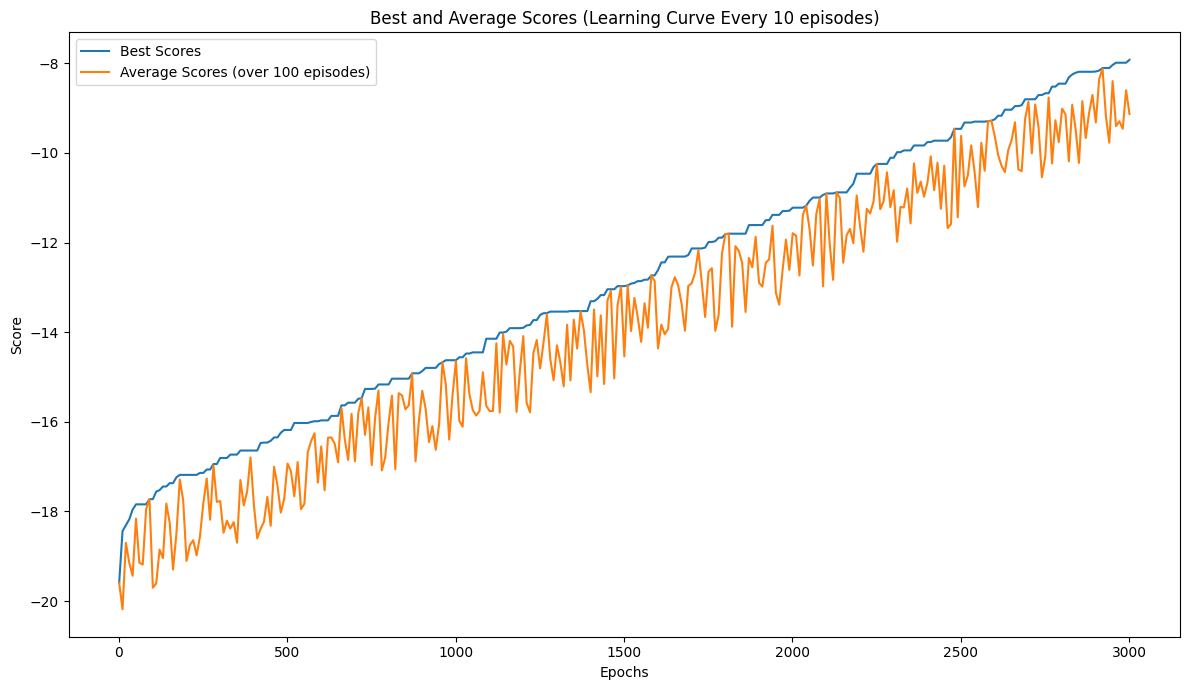

In [9]:
import numpy as np
import matplotlib.pyplot as plt

variables_file = 'session_variables.npz'
if os.path.exists(variables_file):
    session_variables = np.load(variables_file)
    best_rewards_array = session_variables['best_rewards_array']
    avg_scores_array = session_variables['avg_scores_array']

    
n_episodes = len(avg_scores_array)    
x_axis = np.arange(1, n_episodes + 1) 

every_5_episodes = x_axis[::10]
best_rewards_subset = best_rewards_array[::10]
avg_scores_subset = avg_scores_array[::10]

plt.figure(figsize=(12, 7))

plt.plot(every_5_episodes, best_rewards_subset, label='Best Scores ')
plt.plot(every_5_episodes, avg_scores_subset, label='Average Scores (over 100 episodes)')
plt.title('Best and Average Scores (Learning Curve Every 10 episodes)')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

### Observation: DQN Learning Curve (Part B)
- The learning curve shows the progression of **best scores** and **average scores (over 100 episodes)** over 3000 epochs.
- Both metrics indicate a positive trend, with the **best scores** gradually increasing and surpassing an average score of -10 by the end of the training.
- The **average score** line demonstrates more fluctuations due to the rolling average, but it follows a similar upward trend, reflecting consistent improvement in agent performance.
- This trend suggests that the DQN model successfully learns and improves over time in the given environment, gradually achieving higher scores as training progresses.


In [ ]:
class DQNAgent:
    def __init__(self, input_size, n_actions, max_mem_size, batch_size, network_clone_interval,
                 gamma, epsilon, lr, min_epsilon, epsilon_decay_rate, pong=False):
        
        self.input_size = input_size
        self.n_actions = n_actions
        self.action_space = [i for i in range(n_actions)]
        self.max_mem_size = max_mem_size
        self.batch_size = batch_size
        self.network_clone_interval = network_clone_interval
        self.gamma = gamma
        self.epsilon = epsilon
        self.lr = lr
        self.min_epsilon = min_epsilon
        self.epsilon_decay_rate = epsilon_decay_rate
        self.learn_step_ctr = 0
        
        self.Q_network = DQNetwork(input_size=input_size, fc1_size=24, fc2_size=48, n_actions=n_actions, lr=lr)
        self.target_Q_network = copy.deepcopy(self.Q_network)

        self.mem_ctr = 0
        self.state_memory = np.zeros((self.max_mem_size, *input_size), dtype=np.float32)
        self.new_state_memory = np.zeros((self.max_mem_size, *input_size), dtype=np.float32)
        self.action_memory = np.zeros(self.max_mem_size, dtype=np.int64)
        self.reward_memory = np.zeros(self.max_mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.max_mem_size, dtype=bool)


    def setup_network(self, pong):

        if not pong:
            self.Q_network = DQNetwork(self.input_size, fc1_size=24, fc2_size=48, n_actions=self.n_actions, lr=self.lr)
            self.target_Q_network = copy.deepcopy(self.Q_network)
        else:
            self.Q_network = DQN_convnet(self.lr, self.n_actions, input_size=(3, 80, 64))
            self.target_Q_network = DQN_convnet(self.lr, self.n_actions, input_size=(3, 80, 64))

    def setup_memory(self, target_input_size):

        self.mem_ctr = 0
        self.state_memory = np.zeros((self.max_mem_size, *target_input_size), dtype=np.float32)
        self.new_state_memory = np.zeros((self.max_mem_size, *target_input_size), dtype=np.float32)
        self.action_memory = np.zeros(self.max_mem_size, dtype=np.int64)
        self.reward_memory = np.zeros(self.max_mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.max_mem_size, dtype=bool)

    def update_target_network(self):

        self.target_Q_network.load_state_dict(self.Q_network.state_dict())

    def decrease_epsilon(self):

        self.epsilon = max(self.epsilon - self.epsilon_decay_rate, self.min_epsilon)

    def save_models(self, filename):

        os.makedirs('models', exist_ok=True)
        checkpoint = {
            'Q_network_state_dict': self.Q_network.state_dict(),
            'target_Q_network_state_dict': self.target_Q_network.state_dict(),
            'optimiser_state_dict': self.Q_network.optimiser.state_dict(),
            'epsilon': self.epsilon
        }
        T.save(checkpoint, os.path.join('models', filename))

    def load_models(self, filename):

        checkpoint = T.load(filename)
        self.Q_network.load_state_dict(checkpoint['Q_network_state_dict'])
        self.target_Q_network.load_state_dict(checkpoint['target_Q_network_state_dict'])
        self.epsilon = checkpoint['epsilon']
        self.Q_network.optimiser.load_state_dict(checkpoint['optimiser_state_dict'])

    def store_experience(self, state, action, reward, new_state, terminated, truncated):

        mem_index = self.mem_ctr % self.max_mem_size
        self.state_memory[mem_index] = state
        self.new_state_memory[mem_index] = new_state
        self.action_memory[mem_index] = action
        self.reward_memory[mem_index] = reward
        self.terminal_memory[mem_index] = terminated or truncated
        self.mem_ctr += 1

    def choose_action_eps_greedy(self, new_state):

        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_space)
        return self.greedy_action(new_state)

    def greedy_action(self, state):

        state_tensor = T.tensor([state], dtype=T.float).to(self.Q_network.device)
        actions = self.Q_network.forward(state_tensor)
        return T.argmax(actions).item()

    def learn(self):

        if self.mem_ctr < self.batch_size:
            return None

        self.Q_network.optimiser.zero_grad()
        

        filled_mem_count = min(self.mem_ctr, self.max_mem_size)
        batch_indices = np.random.choice(filled_mem_count, self.batch_size, replace=False)
        
        batch_of_states = T.tensor(self.state_memory[batch_indices]).to(self.Q_network.device)
        batch_of_new_states = T.tensor(self.new_state_memory[batch_indices]).to(self.Q_network.device)
        batch_of_rewards = T.tensor(self.reward_memory[batch_indices]).to(self.Q_network.device)
        batch_of_terminals = T.tensor(self.terminal_memory[batch_indices]).to(self.Q_network.device)
        batch_of_actions = self.action_memory[batch_indices]


        estimated_Q_values = self.Q_network.forward(batch_of_states)[np.arange(self.batch_size), batch_of_actions]
        Q_next_values = self.target_Q_network.forward(batch_of_new_states)
        Q_next_values[batch_of_terminals] = 0.0

        target_Q_values = batch_of_rewards + self.gamma * T.max(Q_next_values, dim=1)[0]
        loss = self.Q_network.loss(target_Q_values, estimated_Q_values).to(self.Q_network.device)
        

        loss.backward()
        self.Q_network.optimiser.step()
        
        self.learn_step_ctr += 1
        if self.learn_step_ctr % self.network_clone_interval == 0:
            self.update_target_network()

        return loss.item()

    def preProcess(self, image):

        frame = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        frame = frame[self.crop_dim[0]:self.crop_dim[1], self.crop_dim[2]:self.crop_dim[3]]
        frame = cv2.resize(frame, (self.target_h, self.target_w))
        frame = frame.reshape(self.target_h, self.target_w) / 255
        return frame


In [ ]:
import gymnasium as gym
import numpy as np


env = gym.make("MountainCar-v0")
DQN_agent = DQNAgent(
    input_size=[2], n_actions=3, max_mem_size=50000, batch_size=32,
    network_clone_interval=500, gamma=0.99, epsilon=1.0, lr=0.005,
    min_epsilon=0.01, epsilon_decay_rate=0.05
)


best_score = -np.inf
scores, eps_history, steps_array, best_rewards_array, avg_scores_array = [], [], [], [], []
num_episodes = 500
n_episodes_to_avg_over = 25

for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    episode_reward = 0
    n_steps = 0
    max_position = -1.2

    while not done:

        action = DQN_agent.choose_action_eps_greedy(state)
        

        next_state, reward, terminated, truncated, _ = env.step(action)

        done = terminated or truncated
        

        if next_state[0] >= 0.55:
            reward += 10
        

        

        episode_reward += reward
        n_steps += 1
        

        if next_state[0] > max_position:
            max_position = next_state[0]
        

        DQN_agent.store_experience(state, action, reward, next_state, terminated, done)
        DQN_agent.learn()
        

        state = next_state
    

    scores.append(episode_reward)
    eps_history.append(DQN_agent.epsilon)
    steps_array.append(n_steps)
    
    avg_score = np.mean(scores[-n_episodes_to_avg_over:])
    

    print(f'Episode: {episode}, Score: {episode_reward}, Avg Score: {avg_score:.1f}, '
          f'Best Score: {best_score:.2f}, Epsilon: {DQN_agent.epsilon:.2f}, '
          f'Steps: {n_steps}, Max Position: {max_position}')
    

    if n_steps >= 199:
        print(f"Failed to finish task in episode {episode}")
    else:
        print(f"Success in episode {episode}, used {n_steps} steps!")
    

    DQN_agent.decrease_epsilon()
    

    if avg_score > best_score:
        best_score = avg_score
    

    avg_scores_array.append(avg_score)
    best_rewards_array.append(best_score)


Running on GPU
Episode: 0, Score: -200.0, Avg Score: -200.0, Best Score: -inf, Epsilon: 1.00, Steps: 200, Max Position: -0.4184700548648834
Failed to finish task in episode 0
Episode: 1, Score: -200.0, Avg Score: -200.0, Best Score: -200.00, Epsilon: 0.95, Steps: 200, Max Position: -0.4499886631965637
Failed to finish task in episode 1
Episode: 2, Score: -200.0, Avg Score: -200.0, Best Score: -200.00, Epsilon: 0.90, Steps: 200, Max Position: -0.4185185730457306
Failed to finish task in episode 2
Episode: 3, Score: -200.0, Avg Score: -200.0, Best Score: -200.00, Epsilon: 0.85, Steps: 200, Max Position: -0.27870315313339233
Failed to finish task in episode 3
Episode: 4, Score: -200.0, Avg Score: -200.0, Best Score: -200.00, Epsilon: 0.80, Steps: 200, Max Position: -0.38105952739715576
Failed to finish task in episode 4
Episode: 5, Score: -200.0, Avg Score: -200.0, Best Score: -200.00, Epsilon: 0.75, Steps: 200, Max Position: -0.2671278119087219
Failed to finish task in episode 5
Episode:

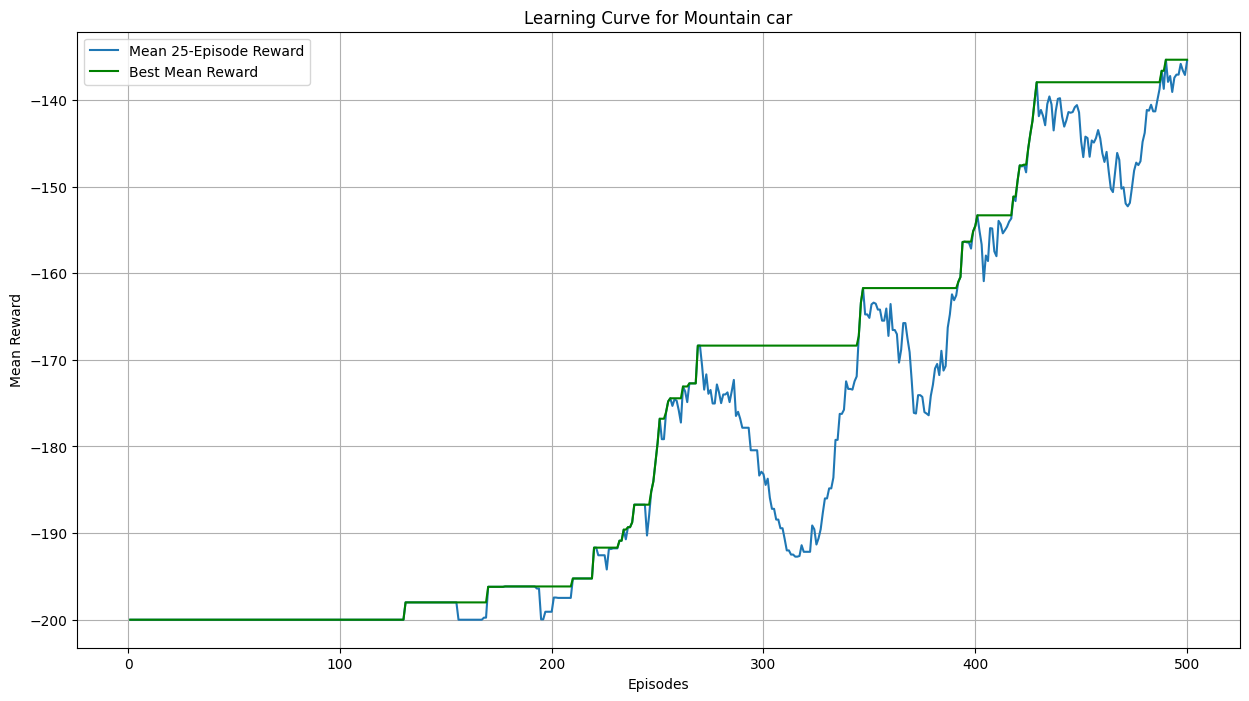

In [14]:
num_episodes = 500
plt.figure(figsize=(15, 8))
plt.plot(np.arange(1, num_episodes + 1), avg_scores_array[:500], label=f"Mean 25-Episode Reward")
plt.plot(np.arange(1, num_episodes + 1), best_rewards_array[:500], 'g', label="Best Mean Reward")
plt.xlabel("Episodes")
plt.ylabel("Mean Reward")
plt.legend()
plt.title("Learning Curve for Mountain car")
plt.grid(True)
plt.show()

### Observation: Mountain Car Learning Curve
- This plot shows the **Mean 25-Episode Reward** and **Best Mean Reward** over 500 episodes in the Mountain Car environment.
- The **mean reward** gradually improves from an initial value around -200, indicating that the agent is learning to achieve higher rewards over time.
- Several plateaus in the **best mean reward** are observed, suggesting periods where learning slows down before further improvement.
- By the end of training, the **best mean reward** stabilizes around -140, showing significant progress from the starting point.
- This trend reflects the effectiveness of the agent in learning the challenging Mountain Car task, although improvements remain incremental as it approaches higher scores.


## c)

Running experiment with learning rate: 0.001
Running on GPU
Episode 0, Score: -200.0, Avg Score: -200.00, Epsilon: 1.00
Episode 1, Score: -200.0, Avg Score: -200.00, Epsilon: 0.95
Episode 2, Score: -200.0, Avg Score: -200.00, Epsilon: 0.90
Episode 3, Score: -200.0, Avg Score: -200.00, Epsilon: 0.85
Episode 4, Score: -200.0, Avg Score: -200.00, Epsilon: 0.80
Episode 5, Score: -200.0, Avg Score: -200.00, Epsilon: 0.75
Episode 6, Score: -200.0, Avg Score: -200.00, Epsilon: 0.70
Episode 7, Score: -200.0, Avg Score: -200.00, Epsilon: 0.65
Episode 8, Score: -200.0, Avg Score: -200.00, Epsilon: 0.60
Episode 9, Score: -200.0, Avg Score: -200.00, Epsilon: 0.55
Episode 10, Score: -200.0, Avg Score: -200.00, Epsilon: 0.50
Episode 11, Score: -200.0, Avg Score: -200.00, Epsilon: 0.45
Episode 12, Score: -200.0, Avg Score: -200.00, Epsilon: 0.40
Episode 13, Score: -200.0, Avg Score: -200.00, Epsilon: 0.35
Episode 14, Score: -200.0, Avg Score: -200.00, Epsilon: 0.30
Episode 15, Score: -200.0, Avg Scor

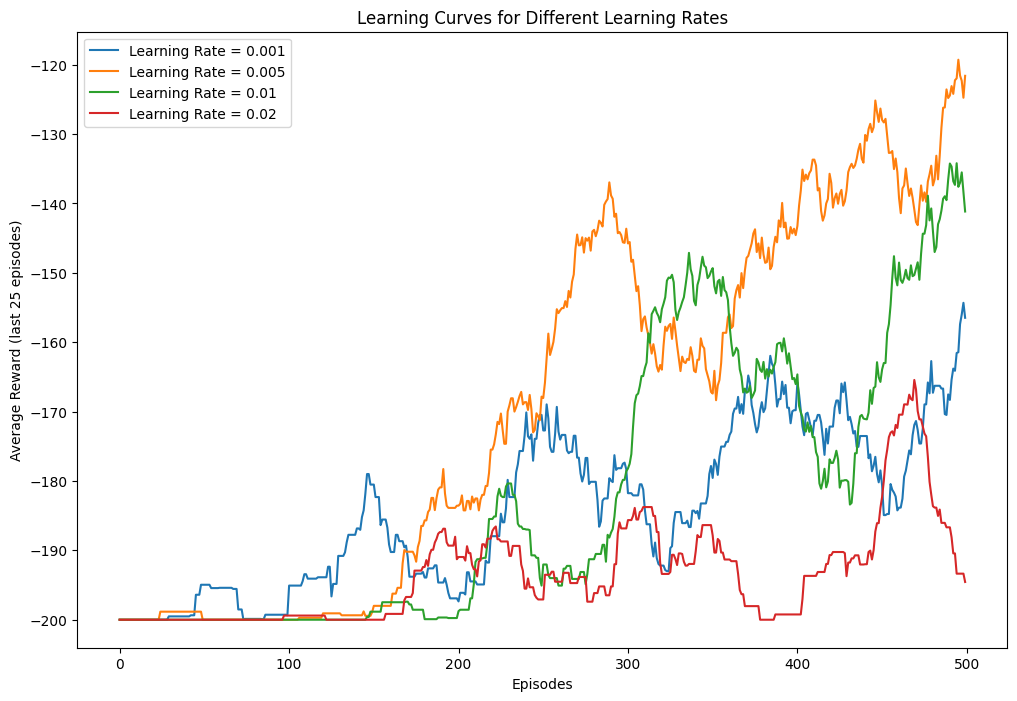

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


learning_rates = [0.001, 0.005, 0.01, 0.02]
num_episodes = 500
n_episodes_to_avg_over = 25


results = {}


for lr in learning_rates:
    print(f"Running experiment with learning rate: {lr}")
    

    DQN_agent = DQNAgent(input_size=[2], n_actions=3, max_mem_size=50000, batch_size=32, network_clone_interval=500,
                         gamma=0.99, epsilon=1.0, lr=lr, min_epsilon=0.01, epsilon_decay_rate=0.05)
    
    scores = []  
    avg_scores = []  

    for episode in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0
        n_steps = 0
        
        while not done:
            action = DQN_agent.choose_action_eps_greedy(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            

            if next_state[0] >= 0.55:
                reward += 10
            
            done = terminated or truncated
            episode_reward += reward
            n_steps += 1
            

            DQN_agent.store_experience(state, action, reward, next_state, terminated, truncated)
            DQN_agent.learn()
            state = next_state
        
        scores.append(episode_reward)
        avg_score = np.mean(scores[-n_episodes_to_avg_over:])
        avg_scores.append(avg_score)
        
        print(f"Episode {episode}, Score: {episode_reward}, Avg Score: {avg_score:.2f}, Epsilon: {DQN_agent.epsilon:.2f}")
        

        DQN_agent.decrease_epsilon()
    

    results[lr] = avg_scores


plt.figure(figsize=(12, 8))
for lr, avg_scores in results.items():
    plt.plot(avg_scores, label=f"Learning Rate = {lr}")
    
plt.xlabel("Episodes")
plt.ylabel("Average Reward (last 25 episodes)")
plt.title("Learning Curves for Different Learning Rates")
plt.legend()
plt.show()


### Observations on Learning Rate Impact

1. **General Trend**: Lower learning rates (0.001 and 0.005) appear to result in more stable learning, though they may converge more slowly. Higher learning rates, like 0.02, exhibit more erratic behavior, suggesting potential instability.

2. **Optimal Performance**: The learning rate of 0.005 (orange) seems to yield the best balance between stability and performance, achieving higher average rewards earlier and with less fluctuation compared to other rates.

3. **High Learning Rate (0.02)**: The red line, corresponding to a learning rate of 0.02, displays significant volatility, with sharp rises and falls. This may indicate that the model struggles to stabilize, likely due to large updates in the gradient.

4. **Low Learning Rate (0.001)**: While more stable, the learning rate of 0.001 (blue) demonstrates slower improvement, potentially taking longer to converge to higher rewards. 

5. **Trade-off Insight**: These results suggest a trade-off between learning speed and stability. A moderate learning rate like 0.005 might be preferable in this scenario to balance stability with faster convergence.


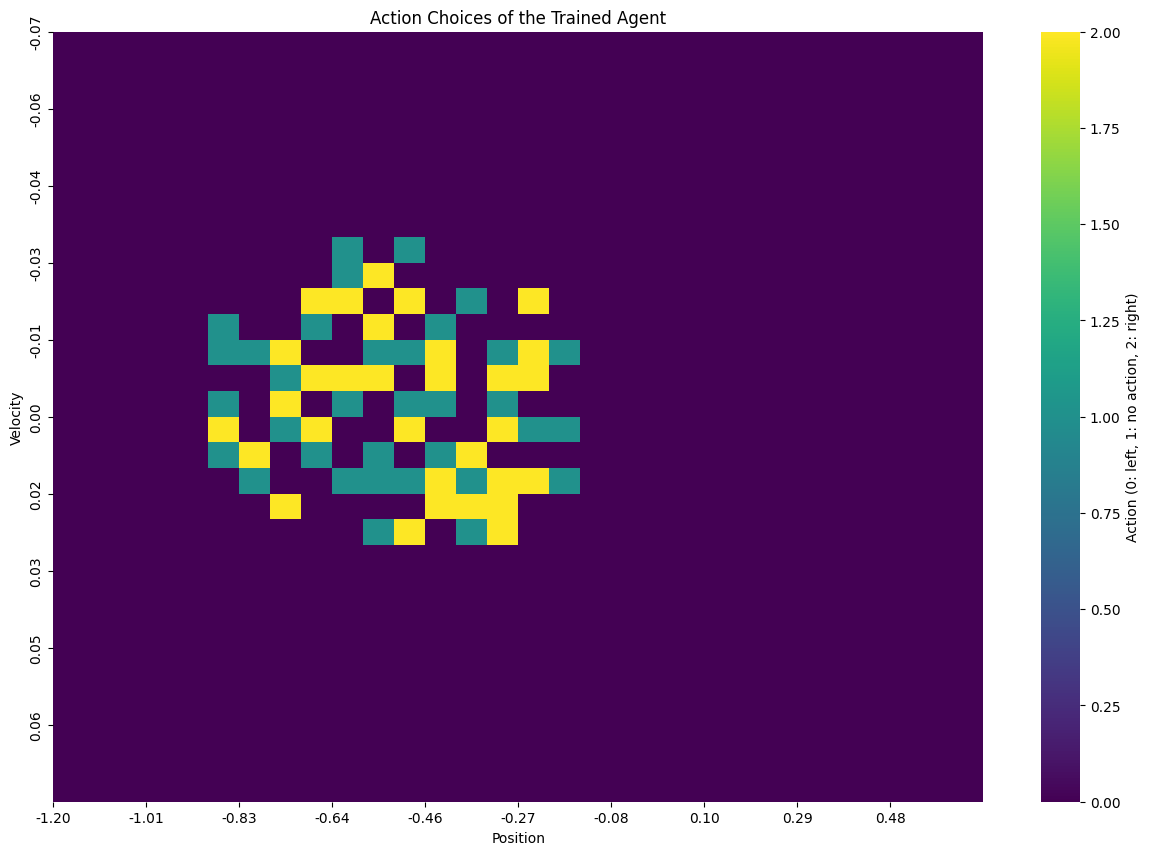

In [ ]:
def plot_action_choices(env, num_positions, num_velocities, num_actions, num_episodes_test):
    
    action_choices = np.zeros((num_positions, num_velocities, num_actions), dtype=np.int32)

    for _ in range(num_episodes_test):  
        state, _ = env.reset()
        done = False

        while not done:
            action = DQN_agent.choose_action_eps_greedy(state)  
            next_state, reward, terminated, truncated,  _ = env.step(action)
            
            position = state[0]
            velocity = state[1]
            position_bin = int((position - env.observation_space.low[0]) / (env.observation_space.high[0] - env.observation_space.low[0]) * num_positions)
            velocity_bin = int((velocity - env.observation_space.low[1]) / (env.observation_space.high[1] - env.observation_space.low[1]) * num_velocities)
            action_choices[position_bin][velocity_bin][action] += 1
            
            done = terminated or truncated
            state = next_state
    plt.figure(figsize=(15, 10))

    position_values = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num_positions)
    velocity_values = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num_velocities)

    heatmap = sns.heatmap(action_choices.argmax(axis=2).T, cmap="viridis", cbar_kws={'label': "Action (0: left, 1: no action, 2: right)"})
    heatmap.set_xticks(np.arange(0, num_positions, num_positions // 10))
    heatmap.set_xticklabels(['%.2f' % val for val in position_values[::num_positions // 10]])
    heatmap.set_yticks(np.arange(0, num_velocities, num_velocities // 10))
    heatmap.set_yticklabels(['%.2f' % val for val in velocity_values[::num_velocities // 10]])

    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.title('Action Choices of the Trained Agent')

    plt.show()

num_positions = 30 
num_velocities = 30 
num_actions = 3  
num_episodes_test = 50
env = gym.make("MountainCar-v0")
plot_action_choices(env, num_positions, num_velocities, num_actions, num_episodes_test)

### Observations on Action Choices of the Trained Agent

1. **Action Distribution**: The agent’s actions appear to be well-distributed across different regions of the state space (position and velocity). The color-coded regions indicate varying actions, where yellow represents "right" (action 2), teal represents "no action" (action 1), and dark blue represents "left" (action 0).

2. **State-Specific Preferences**: The agent seems to prefer "right" actions (yellow) in specific regions, likely where it needs to push the system forward, possibly when velocity is slightly negative or around zero. This could indicate the agent’s strategy to maximize forward momentum in states where moving forward is beneficial.

3. **Balanced Decision-Making**: The presence of all three actions (left, no action, right) suggests that the agent has learned to make decisions based on its position and velocity. This diversity in actions could imply that the agent has effectively learned a policy that adapts to varying state conditions.

4. **Concentration of Actions**: The actions are concentrated around the center of the position range, indicating that the agent spends most of its time in these regions. This may suggest that these states are crucial for balancing or transitioning between movements in the environment.
